In [1]:
import os
from copy import deepcopy  
import numpy as np
import pandas as pd
from data_median_dist import *
from base_density import *
from basis_function import *

from scorematching_finexpfam import *
from negloglik_finexpfam import *
from unnormalized_density import *
from plot_density_1d import *

import seaborn
import scipy

from datetime import datetime

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline

import matplotlib.gridspec as gridspec

In [2]:
os.chdir('/home/zhouc1/notebooks/definexpfam_results/iris')
true_data = pd.read_csv('iris.csv')# .astype(np.float64)
var_name = 'Petal_Width' # 'Sepal_Width' # 
df = deepcopy(true_data[var_name]).to_numpy().reshape(-1, 1)
xlimit = (0., 4.)
ylimit = (-0.005, 1.42)

# sepal_length = deepcopy(true_data['Sepal_Length']).to_numpy().reshape(-1, 1) # (2., 10.), (-0.005, 0.99)
# sepal_width = deepcopy(true_data['Sepal_Width']).to_numpy().reshape(-1, 1) # (0., 6.), (-0.005, 0.99)
# petal_length = deepcopy(true_data['Petal_Length']).to_numpy().reshape(-1, 1) # (0., 9.), (-0.005, 1.42)
# petal_width = deepcopy(true_data['Petal_Width']).to_numpy().reshape(-1, 1) # (0., 4.), (-0.005, 1.42)

In [ ]:
pd.Series(df.flatten()).describe()

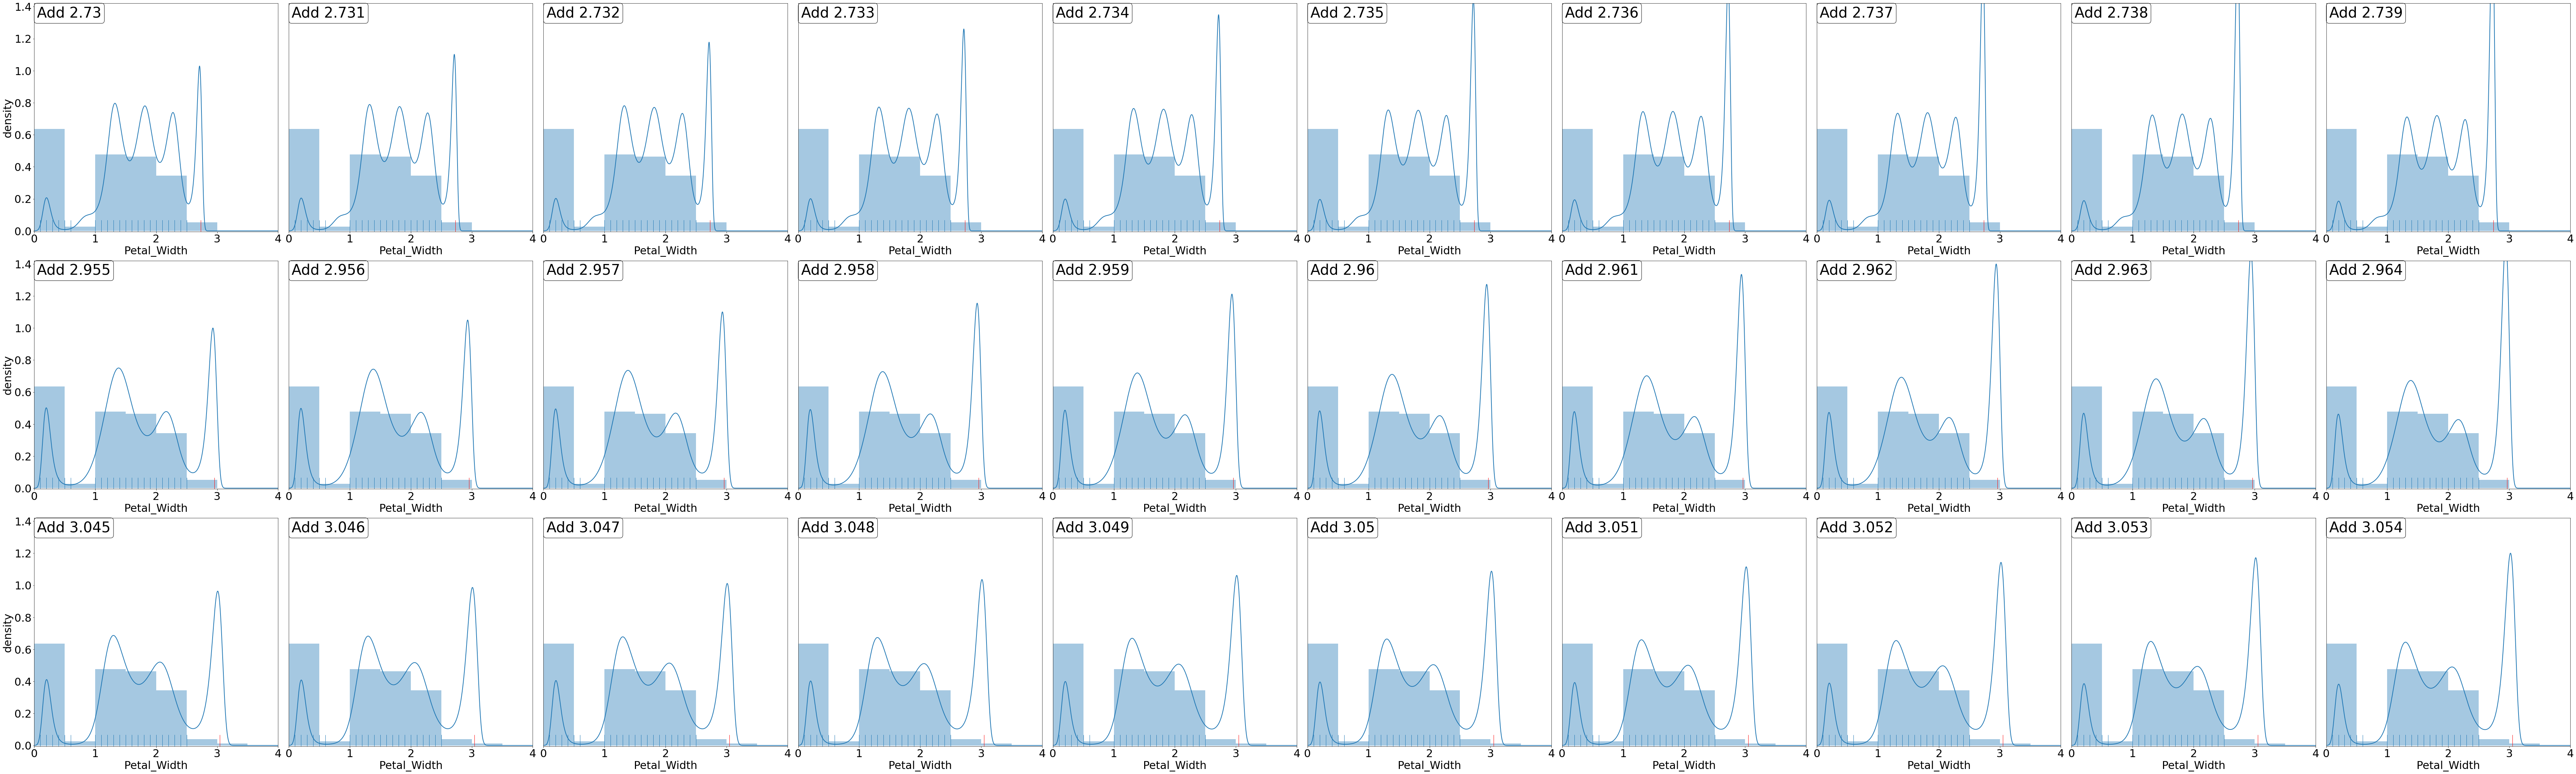

In [4]:
plot_pts_cnt = 4000
newx = np.linspace(xlimit[0], xlimit[1], plot_pts_cnt).reshape(-1, 1)

fig = plt.figure(constrained_layout=False)

basisfunction_name = 'Gaussian'
fig.set_figheight(30)
fig.set_figwidth(100)
ncols = 10
nrows = 3
fontsize = 30
fontsize1 = 40
linewidth = 2.0

spec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)
outlier_list = [2.73, 2.731, 2.732, 2.733, 2.734, 2.735, 2.736, 2.737, 2.738, 2.739]

for i in range(ncols): 
    bw = 0.5
    ax = fig.add_subplot(spec[0, i])
    true_data = pd.read_csv('iris.csv')# .astype(np.float64)
    df = deepcopy(true_data[var_name]).to_numpy().reshape(-1, 1)

    outlier = outlier_list[i]
    df = np.vstack([df, np.array([outlier])])
    # df[df == 0.8333333] = outlier 
    pddf = pd.DataFrame({'vals': df.flatten(), 
                         'cate': [False if df[i] != outlier else True for i in range(df.shape[0])]})
    # bw = bw_list[i]
    file_name = f'add{outlier}_denvals_scorematching_bw={bw}_unique.npy'
    denvals = np.load(f'{var_name}/{basisfunction_name}_basis_function/scorematching/' + file_name)

    ax.plot(newx.flatten(), denvals.flatten(), color = 'tab:blue', linewidth = linewidth)
    # seaborn.rugplot(data = pddf, x = 'vals', axis = 'x', ax = ax, hue = 'cate', clip_on = False)
    seaborn.rugplot(pddf['vals'], axis = 'x', ax = ax)
    seaborn.rugplot(np.array([outlier]), axis = 'x', ax = ax, color = 'red')
    
    ax.hist(df.flatten(),
            color='tab:blue',
            bins='fd',
            range=xlimit,
            density=True,
            alpha=0.4)
    if i == 0: 
        ax.set_ylabel(r'density', fontsize = fontsize)
    ax.set_xlim(xlimit)
    ax.set_ylim(ylimit)
    # ax.axvline(108., 0, 1, ls = '--', color = 'tab:purple', alpha = 0.5)
    # ax.tick_params(axis = 'both', labelsize = fontsize)
    # ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = scilimits)
    ax.tick_params(axis = 'both', labelsize = fontsize)
    # ax.set_xticks([])
    if i != 0: 
        ax.set_yticks([])
    ax.set_xlabel(var_name, fontsize = fontsize)

    info = r"Add {out}".format(out = outlier)

    ax.text(0.012, 0.988,
            info,
            fontsize = fontsize1,
            multialignment = 'left',
            horizontalalignment = 'left',
            verticalalignment = 'top',
            transform = ax.transAxes,
            bbox = {'facecolor': 'none',
                    'boxstyle': 'Round, pad=0.2'})

# --------------------------------------------------------------------------------------
outlier_list = [2.955, 2.956, 2.957, 2.958, 2.959, 2.96, 2.961, 2.962, 2.963, 2.964]
for i in range(ncols): 
    bw = 0.8
    ax = fig.add_subplot(spec[1, i])
    true_data = pd.read_csv('iris.csv')# .astype(np.float64)
    df = deepcopy(true_data[var_name]).to_numpy().reshape(-1, 1)

    outlier = outlier_list[i]
    df = np.vstack([df, np.array([outlier])])
    pddf = pd.DataFrame({'vals': df.flatten(), 
                         'cate': [False if df[i] != outlier else True for i in range(df.shape[0])]})
    # bw = bw_list[i]
    file_name = f'add{outlier}_denvals_scorematching_bw={bw}_unique.npy'
    denvals = np.load(f'{var_name}/{basisfunction_name}_basis_function/scorematching/' + file_name)

    ax.plot(newx.flatten(), denvals.flatten(), color = 'tab:blue', linewidth = linewidth)
    # seaborn.rugplot(data = pddf, x = 'vals', axis = 'x', ax = ax, hue = 'cate', clip_on = False)
    seaborn.rugplot(pddf['vals'], axis = 'x', ax = ax)
    seaborn.rugplot(np.array([outlier]), axis = 'x', ax = ax, color = 'red')
    
    ax.hist(df.flatten(),
            color='tab:blue',
            bins='fd',
            range=xlimit,
            density=True,
            alpha=0.4)
    if i == 0: 
        ax.set_ylabel(r'density', fontsize = fontsize)
    ax.set_xlim(xlimit)
    ax.set_ylim(ylimit)
    # ax.axvline(108., 0, 1, ls = '--', color = 'tab:purple', alpha = 0.5)
    # ax.tick_params(axis = 'both', labelsize = fontsize)
    # ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = scilimits)
    ax.tick_params(axis = 'both', labelsize = fontsize)
    # ax.set_xticks([])
    if i != 0: 
        ax.set_yticks([])
    ax.set_xlabel(var_name, fontsize = fontsize)

    info = r"Add {out}".format(out = outlier)

    ax.text(0.012, 0.988,
            info,
            fontsize = fontsize1,
            multialignment = 'left',
            horizontalalignment = 'left',
            verticalalignment = 'top',
            transform = ax.transAxes,
            bbox = {'facecolor': 'none',
                    'boxstyle': 'Round, pad=0.2'})

# -----------------------------------------------------------------------------------
outlier_list = [3.045, 3.046, 3.047, 3.048, 3.049, 3.05, 3.051, 3.052, 3.053, 3.054]
for i in range(ncols): 
    bw = 1.2
    ax = fig.add_subplot(spec[2, i])
    true_data = pd.read_csv('iris.csv')# .astype(np.float64)
    df = deepcopy(true_data[var_name]).to_numpy().reshape(-1, 1)

    outlier = outlier_list[i]
    df = np.vstack([df, np.array([outlier])])
    # df[df == 0.8333333] = outlier 
    pddf = pd.DataFrame({'vals': df.flatten(), 
                         'cate': [False if df[i] != outlier else True for i in range(df.shape[0])]})
    # bw = bw_list[i]
    file_name = f'add{outlier}_denvals_scorematching_bw={bw}_unique.npy'
    denvals = np.load(f'{var_name}/{basisfunction_name}_basis_function/scorematching/' + file_name)

    ax.plot(newx.flatten(), denvals.flatten(), color = 'tab:blue', linewidth = linewidth)
    # seaborn.rugplot(data = pddf, x = 'vals', axis = 'x', ax = ax, hue = 'cate', clip_on = False)
    seaborn.rugplot(pddf['vals'], axis = 'x', ax = ax)
    seaborn.rugplot(np.array([outlier]), axis = 'x', ax = ax, color = 'red')
    
    ax.hist(df.flatten(),
            color='tab:blue',
            bins='fd',
            range=xlimit,
            density=True,
            alpha=0.4)
    if i == 0: 
        ax.set_ylabel(r'density', fontsize = fontsize)
    ax.set_xlim(xlimit)
    ax.set_ylim(ylimit)
    # ax.axvline(108., 0, 1, ls = '--', color = 'tab:purple', alpha = 0.5)
    # ax.tick_params(axis = 'both', labelsize = fontsize)
    # ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = scilimits)
    ax.tick_params(axis = 'both', labelsize = fontsize)
    # ax.set_xticks([])
    if i != 0: 
        ax.set_yticks([])
    ax.set_xlabel(var_name, fontsize = fontsize)

    info = r"Add {out}".format(out = outlier)

    ax.text(0.012, 0.988,
            info,
            fontsize = fontsize1,
            multialignment = 'left',
            horizontalalignment = 'left',
            verticalalignment = 'top',
            transform = ax.transAxes,
            bbox = {'facecolor': 'none',
                    'boxstyle': 'Round, pad=0.2'})
    
plt.tight_layout()

plt.savefig(f'{var_name}_plot_gaussian_add_outliers.pdf')

In [ ]:
new_data_list = []
# bw_list = [4.5, 4.6, 4.7, 4.8, 4.9, 5.2, 6.0]
# [6.0, 8.0, 10.0, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 16.0]
basisfunction_name = 'Triweight'
newx = np.linspace(0., 7., 4000)
fontsize = 10

for bw in bw_list:
# for new_data in new_data_list:
    print('*' * 50)
    print(f'bw = {bw}')
    
    file_name = f'original_denvals_scorematching_bw={bw}_unique.npy'# _0.1_6.9_20.npy'
    # f'original_denvals_scorematching_bw={bw}_unique.npy'
    denvals = np.load(f'{basisfunction_name}_basis_function/scorematching/' + file_name)

    plt.figure(figsize = (10, 10))
    plt.plot(newx.flatten(), denvals.flatten(), color = 'tab:blue')
    plt.plot(eruptions, [-0.001] * len(eruptions), '|', color = 'k')
    plt.hist(eruptions.flatten(),
            color='tab:blue',
            bins='fd',
            range=xlimit,
            density=True,
            alpha=0.4)
    plt.ylabel(r'density', fontsize = fontsize)
    plt.xlim(xlimit)
    plt.ylim(ylimit)
    plt.show()


In [ ]:
# new_data_list = [99, 100, 101, 102, 103, 104, 105, 106, 107]
bw_list = [1.1, 1.2, 1.4, 1.6]
# [6.0, 8.0, 10.0, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 16.0]
basisfunction_name = 'Logistic'
newx = np.linspace(0., 7., 4000)
fontsize = 10

for bw in bw_list:
# for new_data in new_data_list:
    print('*' * 50)
    print(f'bw = {bw}')
    
    file_name = f'original_denvals_scorematching_bw={bw}_0.1_6.9_20.npy'
    # f'original_denvals_scorematching_bw={bw}_unique.npy'
    denvals = np.load(f'{basisfunction_name}_basis_function/scorematching/' + file_name)

    plt.figure(figsize = (10, 10))
    plt.plot(newx.flatten(), denvals.flatten(), color = 'tab:blue')
    plt.plot(eruptions, [-0.001] * len(eruptions), '|', color = 'k')
    plt.hist(eruptions.flatten(),
            color='tab:blue',
            bins='fd',
            range=xlimit,
            density=True,
            alpha=0.4)
    plt.ylabel(r'density', fontsize = fontsize)
    plt.xlim(xlimit)
    plt.ylim(ylimit)
    plt.show()


In [ ]:
?sns.rugplot

In [ ]:
plot_pts_cnt = 4000
newx = np.linspace(21., 124., plot_pts_cnt).reshape(-1, 1)
xlimit = (21., 124.)
ylimit = (-0.005, 0.0701)
fig = plt.figure(constrained_layout=False)
basisfunction_name = 'Gaussian'

fig.set_figheight(10)
fig.set_figwidth(70)
ncols = 7
fontsize = 30
fontsize1 = 40
linewidth = 3.0

spec = gridspec.GridSpec(ncols=ncols, nrows=1, figure=fig)
new_data_list = [99, 100, 101, 102, 103, 104, 105] # [42, 41, 40, 39, 38, 37]

for i in range(ncols): 
    ax = fig.add_subplot(spec[0, i])
    true_data = np.load('geyser.npy').astype(np.float64)
    waiting = true_data[:, 0].reshape(-1, 1)
    
    new_data = new_data_list[i]
    waiting[waiting == 108.] = new_data
    
    file_name = f'shift108to{new_data}_denvals_scorematching_bw=15.0_35_110_16.npy'
    denvals = np.load(f'dataloc_effect/{basisfunction_name}_basis_function/' + file_name)

    ax.plot(newx.flatten(), denvals.flatten(), color = 'tab:blue', linewidth = linewidth)
    seaborn.rugplot(waiting, axis = 'x', ax = ax)
    ax.hist(waiting.flatten(),
            color='tab:blue',
            bins='fd',
            range=xlimit,
            density=True,
            alpha=0.4)
    if i == 0: 
        ax.set_ylabel(r'density', fontsize = fontsize)
    ax.set_xlim(xlimit)
    ax.set_ylim(ylimit)
    # ax.axvline(108., 0, 1, ls = '--', color = 'tab:purple', alpha = 0.5)
    # ax.tick_params(axis = 'both', labelsize = fontsize)
    # ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = scilimits)
    ax.tick_params(axis = 'both', labelsize = fontsize)
    # ax.set_xticks([])
    if i != 0: 
        ax.set_yticks([])
    ax.set_xlabel(r'waiting', fontsize = fontsize)

    info = r"Shift 108 to {}".format(new_data)

    ax.text(0.012, 0.988,
            info,
            fontsize = fontsize1,
            multialignment = 'left',
            horizontalalignment = 'left',
            verticalalignment = 'top',
            transform = ax.transAxes,
            bbox = {'facecolor': 'none',
                    'boxstyle': 'Round, pad=0.2'})

plt.tight_layout()

plt.savefig('waiting_plot_gaussian_basis_dataloc_effect_shift108to99_bw=15.0.pdf')

In [ ]:
os.getcwd()

In [ ]:
plot_pts_cnt = 4000
newx = np.linspace(0., 7., plot_pts_cnt).reshape(-1, 1)
xlimit = (0., 7.0) # (21., 124.) # 
ylimit = (-0.005, 0.971) # (-0.005, 0.0701) #  # 
fig = plt.figure(constrained_layout=False)
basisfunction_name = 'Triweight'

fig.set_figheight(10)
fig.set_figwidth(50)
ncols = 5
fontsize = 30
fontsize1 = 40
linewidth = 3.0
var_name = 'eruptions'

spec = gridspec.GridSpec(ncols=ncols, nrows=1, figure=fig)

# 0, 0
ax = fig.add_subplot(spec[0, 0])
true_data = np.load('geyser.npy').astype(np.float64)
data = true_data[:, 1].reshape(-1, 1)

bw = 4.9
file_name = f'original_denvals_scorematching_bw={bw}_unique.npy'
denvals = np.load(f'{basisfunction_name}_basis_function/scorematching/' + file_name)

ax.plot(newx.flatten(), denvals.flatten(), color = 'tab:blue', linewidth = linewidth)
seaborn.rugplot(data, axis = 'x', ax = ax)
ax.hist(data.flatten(),
        color='tab:blue',
        bins='fd',
        range=xlimit,
        density=True,
        alpha=0.4)
ax.set_ylabel(r'density', fontsize = fontsize)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
# ax.axvline(108., 0, 1, ls = '--', color = 'tab:purple', alpha = 0.5)
# ax.tick_params(axis = 'both', labelsize = fontsize)
# ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = scilimits)
ax.tick_params(axis = 'both', labelsize = fontsize)
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_xlabel(var_name, fontsize = fontsize)

info = r"$\sigma=3.5$"

ax.text(0.012, 0.988,
        info,
        fontsize = fontsize1,
        multialignment = 'left',
        horizontalalignment = 'left',
        verticalalignment = 'top',
        transform = ax.transAxes,
        bbox = {'facecolor': 'none',
                'boxstyle': 'Round, pad=0.2'})

# -----------------------------------------------------------------------------------------------,
# 0, 1
ax = fig.add_subplot(spec[0, 1])

bw = 5.2
file_name = f'original_denvals_scorematching_bw={bw}_unique.npy'
denvals = np.load(f'{basisfunction_name}_basis_function/scorematching/' + file_name)

ax.plot(newx.flatten(), denvals.flatten(), color = 'tab:blue', linewidth = linewidth)
seaborn.rugplot(data, axis = 'x', ax = ax)
ax.hist(data.flatten(),
        color='tab:blue',
        bins='fd',
        range=xlimit,
        density=True,
        alpha=0.4)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.tick_params(axis = 'x', labelsize = fontsize)
ax.set_yticks([])
ax.set_xlabel(var_name, fontsize = fontsize)

info = "$\sigma=4.0$"

ax.text(0.012, 0.988,
        info,
        fontsize = fontsize1,
        multialignment = 'left',
        horizontalalignment = 'left',
        verticalalignment = 'top',
        transform = ax.transAxes,
        bbox = {'facecolor': 'none',
                'boxstyle': 'Round, pad=0.2'})

# -----------------------------------------------------------------------------------------------,
# 0, 1,
ax = fig.add_subplot(spec[0, 2])

bw = 4.7
file_name = f'original_denvals_scorematching_bw={bw}_unique.npy'
denvals = np.load(f'{basisfunction_name}_basis_function/scorematching/' + file_name)

ax.plot(newx.flatten(), denvals.flatten(), color = 'tab:blue', linewidth = linewidth)
seaborn.rugplot(data, axis = 'x', ax = ax)
ax.hist(data.flatten(),
        color='tab:blue',
        bins='fd',
        range=xlimit,
        density=True,
        alpha=0.4)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.tick_params(axis = 'x', labelsize = fontsize)
ax.set_yticks([])
ax.set_xlabel(var_name, fontsize = fontsize)

info = r"$\sigma=4.5$"

ax.text(0.012, 0.988,
        info,
        fontsize = fontsize1,
        multialignment = 'left',
        horizontalalignment = 'left',
        verticalalignment = 'top',
        transform = ax.transAxes,
        bbox = {'facecolor': 'none',
                'boxstyle': 'Round, pad=0.2'})

# -----------------------------------------------------------------------------------------------,
# 0, 1,
ax = fig.add_subplot(spec[0, 3])

bw = 4.8
file_name = f'original_denvals_scorematching_bw={bw}_unique.npy'
denvals = np.load(f'{basisfunction_name}_basis_function/scorematching/' + file_name)

ax.plot(newx.flatten(), denvals.flatten(), color = 'tab:blue', linewidth = linewidth)
seaborn.rugplot(data, axis = 'x', ax = ax)
ax.hist(data.flatten(),
        color='tab:blue',
        bins='fd',
        range=xlimit,
        density=True,
        alpha=0.4)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.tick_params(axis = 'x', labelsize = fontsize)
ax.set_yticks([])
ax.set_xlabel(var_name, fontsize = fontsize)

info = r"$\sigma=5.5$"

ax.text(0.012, 0.988,
        info,
        fontsize = fontsize1,
        multialignment = 'left',
        horizontalalignment = 'left',
        verticalalignment = 'top',
        transform = ax.transAxes,
        bbox = {'facecolor': 'none',
                'boxstyle': 'Round, pad=0.2'})

# -----------------------------------------------------------------------------------------------,
# 0, 1,
ax = fig.add_subplot(spec[0, 4])

bw = 6.0
file_name = f'original_denvals_scorematching_bw={bw}_unique.npy'
denvals = np.load(f'{basisfunction_name}_basis_function/scorematching/' + file_name)

ax.plot(newx.flatten(), denvals.flatten(), color = 'tab:blue', linewidth = linewidth)
seaborn.rugplot(data, axis = 'x', ax = ax)
ax.hist(data.flatten(),
        color='tab:blue',
        bins='fd',
        range=xlimit,
        density=True,
        alpha=0.4)
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.tick_params(axis = 'x', labelsize = fontsize)
ax.set_yticks([])
ax.set_xlabel(r'waiting', fontsize = fontsize)

info = r"$\sigma=6.0$"

ax.text(0.012, 0.988,
        info,
        fontsize = fontsize1,
        multialignment = 'left',
        horizontalalignment = 'left',
        verticalalignment = 'top',
        transform = ax.transAxes,
        bbox = {'facecolor': 'none',
                'boxstyle': 'Round, pad=0.2'})
plt.tight_layout()

plt.savefig('eruptions_plot_triweight_basis.pdf')

In [ ]:
fig = plt.figure(constrained_layout=False)

fig.set_figheight(10)
fig.set_figwidth(50)

xlimit = (21., 124.)
ylimit = (-0.005, 0.0701)
var_name = 'waiting'
fontsize = 30
fontsize1 = 40
linewidth = 3.0
ncols = 5
spec = gridspec.GridSpec(ncols=ncols, nrows=1, figure=fig)
newx = np.linspace(21., 124., 4000)
bw_list = [6.0, 7.0, 8.0, 9.0, 9.1]
basisfunction_name = 'Sigmoid'

# 0, 0
for i in range(ncols - 1): 
    ax = fig.add_subplot(spec[0, i])
    true_data = np.load('geyser.npy').astype(np.float64)
    data = true_data[:, 0].reshape(-1, 1)

    bw = bw_list[i]
    file_name = f'original_denvals_scorematching_bw={bw}_unique.npy'
    denvals = np.load(f'{basisfunction_name}_basis_function/scorematching/' + file_name)

    ax.plot(newx.flatten(), denvals.flatten(), color = 'tab:blue', linewidth = linewidth)
    seaborn.rugplot(data, axis = 'x', ax = ax)
    ax.hist(data.flatten(),
            color='tab:blue',
            bins='fd',
            range=xlimit,
            density=True,
            alpha=0.4)
    if i == 0: 
        ax.set_ylabel(r'density', fontsize = fontsize)
    ax.set_xlim(xlimit)
    ax.set_ylim(ylimit)
    # ax.axvline(108., 0, 1, ls = '--', color = 'tab:purple', alpha = 0.5)
    # ax.tick_params(axis = 'both', labelsize = fontsize)
    # ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = scilimits)
    ax.tick_params(axis = 'both', labelsize = fontsize)
    # ax.set_xticks([])
    if i != 0: 
        ax.set_yticks([])
    ax.set_xlabel(var_name, fontsize = fontsize)

    info = r"$\sigma={bw}$".format(bw=bw)

    ax.text(0.012, 0.988,
            info,
            fontsize = fontsize1,
            multialignment = 'left',
            horizontalalignment = 'left',
            verticalalignment = 'top',
            transform = ax.transAxes,
            bbox = {'facecolor': 'none',
                    'boxstyle': 'Round, pad=0.2'})

# 0, 0
ax = fig.add_subplot(spec[0, 4])
true_data = np.load('geyser.npy').astype(np.float64)
data = true_data[:, 0].reshape(-1, 1)

bw = 9.1
file_name = f'original_logdenvals_scorematching_bw={bw}_unique.npy'
denvals = np.load(f'{basisfunction_name}_basis_function/scorematching/' + file_name)

ax.plot(newx.flatten(), denvals.flatten(), color = 'tab:blue', linewidth = linewidth)

ax.set_ylabel(r'log density', fontsize = fontsize)
ax.set_xlim(xlimit)
# ax.set_ylim(ylimit)
# ax.axvline(108., 0, 1, ls = '--', color = 'tab:purple', alpha = 0.5)
# ax.tick_params(axis = 'both', labelsize = fontsize)
# ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = scilimits)
ax.tick_params(axis = 'both', labelsize = fontsize)
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_xlabel(r'waiting', fontsize = fontsize)

info = r"$\sigma=9.1$"

ax.text(0.012, 0.988,
        info,
        fontsize = fontsize1,
        multialignment = 'left',
        horizontalalignment = 'left',
        verticalalignment = 'top',
        transform = ax.transAxes,
        bbox = {'facecolor': 'none',
                'boxstyle': 'Round, pad=0.2'})

plt.tight_layout()
plt.savefig('waiting_plot_sigmoid_basis.pdf')


In [ ]:
fig = plt.figure(constrained_layout=False)

fig.set_figheight(10)
fig.set_figwidth(50)

fontsize = 30
fontsize1 = 40
linewidth = 3.0
ncols = 5
spec = gridspec.GridSpec(ncols=ncols, nrows=1, figure=fig)
newx = np.linspace(21., 124., 4000)
degree_list = [4, 5, 6, 7, 8]
basisfunction_name = 'Polynomial'

for i in range(ncols): 
    ax = fig.add_subplot(spec[0, i])
    true_data = np.load('geyser.npy').astype(np.float64)
    data = true_data[:, 0].reshape(-1, 1)

    degree = degree_list[i]
    file_name = f'original_denvals_scorematching_bw={degree}.npy'
    denvals = np.load(f'{basisfunction_name}_basis_function/scorematching/' + file_name)

    ax.plot(newx.flatten(), denvals.flatten(), color = 'tab:blue', linewidth = linewidth)
    seaborn.rugplot(data, axis = 'x', ax = ax)
    ax.hist(data.flatten(),
            color='tab:blue',
            bins='fd',
            range=xlimit,
            density=True,
            alpha=0.4)
    if i == 0: 
        ax.set_ylabel(r'density', fontsize = fontsize)
    ax.set_xlim(xlimit)
    ax.set_ylim(ylimit)
    # ax.axvline(108., 0, 1, ls = '--', color = 'tab:purple', alpha = 0.5)
    # ax.tick_params(axis = 'both', labelsize = fontsize)
    # ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = scilimits)
    ax.tick_params(axis = 'both', labelsize = fontsize)
    # ax.set_xticks([])
    if i != 0: 
        ax.set_yticks([])
    ax.set_xlabel(var_name, fontsize = fontsize)

    info = f"Degree={degree}"
    
    ax.text(0.012, 0.988,
            info,
            fontsize = fontsize1,
            multialignment = 'left',
            horizontalalignment = 'left',
            verticalalignment = 'top',
            transform = ax.transAxes,
            bbox = {'facecolor': 'none',
                    'boxstyle': 'Round, pad=0.2'})
    
plt.tight_layout()
plt.savefig('waiting_plot_polynomial_basis.pdf')
